In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

df = pd.read_csv('pima-indians-diabetes.data', header=None,
                 names=['preg', 'gluc', 'blood_p', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class'])
df.head()

,preg,gluc,blood_p,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,preg,gluc,blood_p,skin,insu,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
bins = range(10, 60, 4)
df['bmi_bin'] = pd.cut(df['bmi'], bins, labels=bins[:-1])
df.head()

,preg,gluc,blood_p,skin,insu,bmi,pedi,age,class,bmi_bin
0,6,148,72,35,0,33.6,0.627,50,1,30
1,1,85,66,29,0,26.6,0.351,31,0,26
2,8,183,64,0,0,23.3,0.672,32,1,22
3,1,89,66,23,94,28.1,0.167,21,0,26
4,0,137,40,35,168,43.1,2.288,33,1,42


In [4]:
grouped = df[['bmi_bin', 'class']].groupby(['bmi_bin'], as_index=False).mean()
grouped['class'] = grouped['class'].fillna(0.0)
df = df.drop('bmi_bin', axis=1)
grouped

,bmi_bin,class
0,10,0.000000
1,14,0.000000
2,18,0.000000
3,22,0.106195
4,26,0.270833
5,30,0.439306
6,34,0.451389
7,38,0.378378
8,42,0.612245
9,46,0.588235


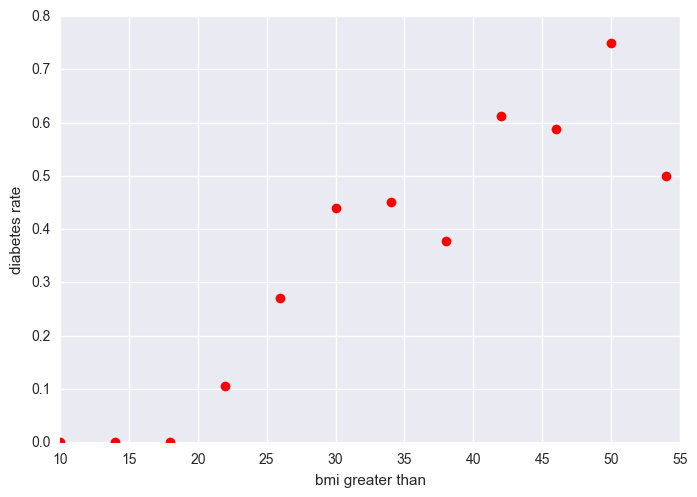

In [5]:
plt.plot(bins[:-1], grouped['class'], 'ro')
plt.xlabel('bmi greater than')
plt.ylabel('diabetes rate')
plt.show()

In [ ]:
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score, verbose=100, n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

~~~~
Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.687 (+/-0.047) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.686 (+/-0.067) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.676 (+/-0.068) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.692 (+/-0.062) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.634 (+/-0.070) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.702 (+/-0.083) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.627 (+/-0.061) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.700 (+/-0.045) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.717 (+/-0.067) for {'C': 1, 'kernel': 'linear'}
0.709 (+/-0.064) for {'C': 10, 'kernel': 'linear'}
0.713 (+/-0.060) for {'C': 100, 'kernel': 'linear'}
0.727 (+/-0.092) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.81      0.73      0.77        99
          1       0.58      0.69      0.63        55

avg / total       0.73      0.71      0.72       154
~~~~